In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
#Loading the dataset
x = "/kaggle/input/house-prices-advanced-regression-techniques/train.csv"
df = pd.read_csv(x,index_col="Id")
X = df.drop("SalePrice",1)   #Feature Matrix
y = df["SalePrice"]          #Target Variable
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


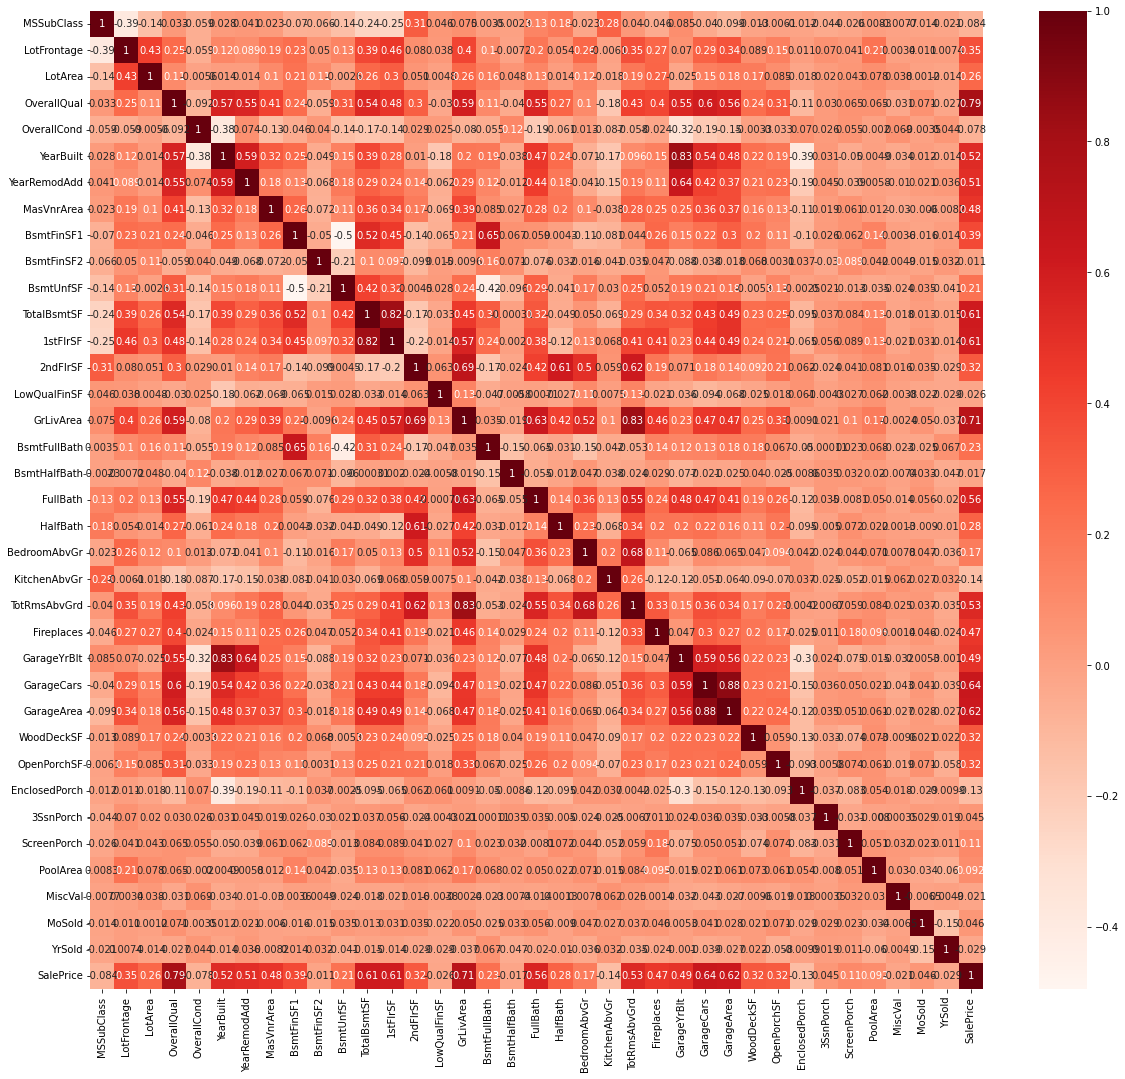

In [3]:
#Using Pearson Correlation
plt.figure(figsize=(20,18))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [4]:
#Correlation with output variable
cor_target = abs(cor["SalePrice"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [5]:
#loop through results to determine cross correlations
for i in relevant_features.index:
    c = abs(df.loc[:,relevant_features.index].corr()[i])
    print(c[c<0.5])

1stFlrSF        0.476224
TotRmsAbvGrd    0.427452
Name: OverallQual, dtype: float64
TotalBsmtSF     0.391452
1stFlrSF        0.281986
GrLivArea       0.199010
FullBath        0.468271
TotRmsAbvGrd    0.095589
GarageArea      0.478954
Name: YearBuilt, dtype: float64
TotalBsmtSF     0.291066
1stFlrSF        0.240379
GrLivArea       0.287389
FullBath        0.439046
TotRmsAbvGrd    0.191740
GarageCars      0.420622
GarageArea      0.371600
Name: YearRemodAdd, dtype: float64
YearBuilt       0.391452
YearRemodAdd    0.291066
GrLivArea       0.454868
FullBath        0.323722
TotRmsAbvGrd    0.285573
GarageCars      0.434585
GarageArea      0.486665
Name: TotalBsmtSF, dtype: float64
OverallQual     0.476224
YearBuilt       0.281986
YearRemodAdd    0.240379
FullBath        0.380637
TotRmsAbvGrd    0.409516
GarageCars      0.439317
GarageArea      0.489782
Name: 1stFlrSF, dtype: float64
YearBuilt       0.199010
YearRemodAdd    0.287389
TotalBsmtSF     0.454868
GarageCars      0.467247
GarageAre

Keeping TotRmsAbvGrd; OverallQual; 1stFlrSF

In [6]:
X_P = X[["TotRmsAbvGrd","OverallQual","1stFlrSF"]]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder

In [8]:
X_no = X.loc[:,X.dtypes != 'object'].fillna(0)

In [9]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X_no)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const            7.264035e-01
MSSubClass       3.189598e-10
LotFrontage      7.467944e-01
LotArea          8.426358e-05
OverallQual      1.305867e-45
OverallCond      6.781146e-07
YearBuilt        2.651244e-08
YearRemodAdd     6.263570e-02
MasVnrArea       1.921396e-06
BsmtFinSF1       1.463518e-04
BsmtFinSF2       9.797964e-01
BsmtUnfSF        8.156945e-01
TotalBsmtSF      6.481779e-03
1stFlrSF         2.419018e-03
2ndFlrSF         4.515894e-04
LowQualFinSF     4.979872e-01
GrLivArea        5.383373e-07
BsmtFullBath     1.018408e-03
BsmtHalfBath     6.672073e-01
FullBath         2.503664e-01
HalfBath         4.630843e-01
BedroomAbvGr     1.174871e-09
KitchenAbvGr     2.626639e-03
TotRmsAbvGrd     5.107920e-05
Fireplaces       1.979552e-02
GarageYrBlt      6.867460e-08
GarageCars       1.593977e-07
GarageArea       6.120948e-01
WoodDeckSF       1.080968e-03
OpenPorchSF      6.781902e-01
EnclosedPorch    4.853141e-01
3SsnPorch        5.002949e-01
ScreenPorch      7.176934e-04
PoolArea  

In [10]:
#Backward Elimination
cols = list(X_no.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_no[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'ScreenPorch']


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

In [11]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_no,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False  True False False False False False False False False
 False False False False  True  True  True False False  True False  True
 False  True False False False False False False False False False False]
[ 8 15 29  1  5  7 10 13 22 30 27 24 17 18 21 11  1  1  1  4  3  1  2  1
 20  1 26 14 25 23 19 12 16 28  9  6]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [12]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X_no,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pa

Optimum number of features: 11
Score with 11 features: 0.730427


In [13]:
cols = list(X_no.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_no,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['OverallQual', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars'],
      dtype='object')


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [14]:
reg = LassoCV()
reg.fit(X_no, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_no,y))
coef = pd.Series(reg.coef_, index = X_no.columns)

Best alpha using built-in LassoCV: 209067.774683
Best score using built-in LassoCV: 0.723616


In [15]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 12 variables and eliminated the other 24 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

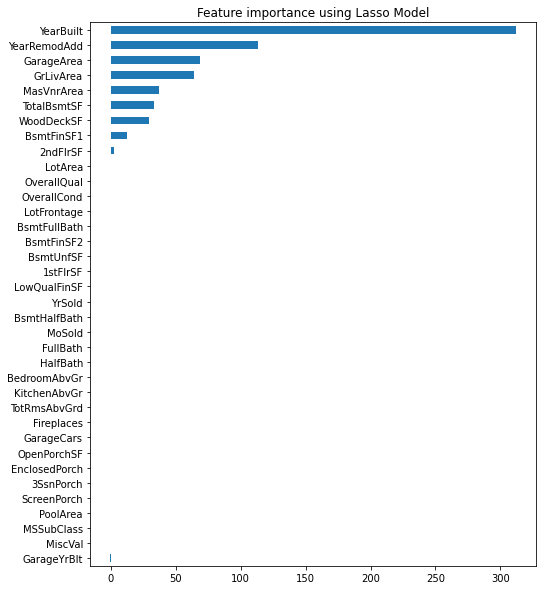

In [16]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")